In [39]:
# pip install nilearn within 
import nilearn as nib

import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import nibabel as nib
import seaborn as sns
import numpy as np
import glob

from nilearn.plotting import plot_surf, plot_surf_contours

# nilearn import (later in the code)
import os
os.chdir("/scratch/a/arisvoin/iismail")

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /gpfs/fs0/scratch/a/arisvoin/iismail


In [40]:
#Convert vectorized into sorted matrix.
def visvec(cwin,netlabels):
    
    #Format.
    corrmat = pd.DataFrame(cwin)
    
    #Add a column for the labels.
    rowlabelled = pd.concat([pd.Series(netlabels),pd.DataFrame(corrmat)],axis=1)
    
    #Add a row for the labels.
    colnetlabels = [0] + netlabels
    rowlabelled.loc[-1] = colnetlabels
    rowlabelled.index = rowlabelled.index + 1
    collabelled = rowlabelled.sort_index()
    collabelled.columns = range(361)
    
    #Adds axes labels to enable reference.
    collabelled = collabelled.rename_axis('Index')
    collabelled = collabelled.rename_axis('Columns',axis='columns')
    
    #Sort the rows and columns.w
    rowsort = collabelled.sort_values(by=[0,'Index'],axis=0)
    colsort = rowsort.sort_values(by=[0,'Columns'],axis=1)
    
    #Reset indices. Save the matrix to list.
    reformatted = colsort.reset_index(drop=True)
    reformatted.columns = range(reformatted.shape[1])
    return reformatted


#Read in network labels and convert them to integers.
with open('colenetlabels.txt') as f:
    netlabels = [label.rstrip() for label in f] 
netlabels = list(map(int,netlabels))
print(netlabels)

[1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 6, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 8, 4, 6, 10, 10, 7, 9, 9, 9, 9, 9, 9, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 5, 3, 2, 2, 5, 3, 3, 3, 3, 3, 3, 4, 7, 4, 4, 9, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 6, 9, 7, 4, 6, 7, 7, 4, 7, 4, 7, 4, 9, 9, 7, 9, 7, 7, 7, 9, 5, 5, 7, 7, 4, 3, 3, 3, 8, 3, 4, 4, 8, 4, 4, 12, 7, 12, 4, 4, 3, 5, 5, 9, 9, 9, 1, 11, 6, 8, 6, 9, 5, 9, 6, 9, 9, 9, 7, 9, 11, 5, 5, 2, 6, 10, 10, 1, 5, 7, 7, 5, 4, 4, 7, 9, 9, 2, 2, 2, 9, 2, 2, 2, 2, 2, 9, 7, 2, 9, 9, 12, 4, 3, 4, 7, 7, 6, 8, 8, 8, 9, 7, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 5, 6, 2, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 8, 6, 6, 10, 6, 7, 9, 9, 9, 9, 9, 9, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 5, 3, 2, 2, 5, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 9, 9, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 6, 6, 9, 7, 4, 6, 7, 6, 7, 7, 4, 7, 4, 9, 9, 7, 9, 7, 7, 9, 9, 5, 5, 7, 7, 4, 3, 3, 3, 8, 8, 4, 4, 8, 4, 4, 12, 7, 12, 4, 4, 3, 5, 5, 9, 9, 9, 1, 11, 6, 8, 6, 9, 5, 6, 6, 9, 9, 9, 7, 9, 11, 5, 5, 2, 6, 10, 10, 1, 5, 7, 7, 5, 4, 4,

In [52]:
# RETRIVEING FILES''
files = sorted(glob.glob("/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data//r_meants/861456/demean_rfMRI*.csv", recursive = True))
print(files)

['/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data//r_meants/861456/demean_rfMRI_REST1_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv', '/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data//r_meants/861456/demean_rfMRI_REST1_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv', '/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data//r_meants/861456/demean_rfMRI_REST2_LR_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv', '/scratch/a/arisvoin/iismail/HCP_TimeSeries_Data//r_meants/861456/demean_rfMRI_REST2_RL_Atlas_MSMAll_hp2000_clean.dtseries.nii_meants.csv']


In [69]:
#the for loop creating the connectivity matrices
list_of_matrices=[]
for i in files:
    
   # ptseries_glasser392_file = i
  #  glasser_ptseries_nib = nib.load(ptseries_glasser392_file)
    #print(glasser_ptseries_nib.get_fdata().shape) -> testing
    
    ## creating the correlation matrix using pandas
  #  ts_data = glasser_ptseries_nib.get_fdata()
 #   ts_df = pd.DataFrame(glasser_ptseries_nib.get_fdata(), columns=schaefer400_parcels)
    ts_df=pd.read_csv(i,header=None)
    #glasser392_corZ_pd = np.arctanh(ts_df.T.corr())


    ts_cor_df = ts_df.T.corr()  ## you can just call corr() on the pandas dataframe to get a correlation matrix
    ts_corZ_df = np.arctanh(ts_cor_df) ## the Fisher's r-to-z transform - we usually do this before stats
    #print(ts_corZ_df)
    reformatted = visvec(ts_corZ_df,netlabels)
  #  print(reformatted.iloc[1:,1:].values)
    list_of_matrices.append(reformatted.iloc[1:,1:].values)

/gpfs/fs0/scratch/a/arisvoin/iismail/pythonimports/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in arctanh


In [49]:
#if len(list_of_matrices) > 0 and all(isinstance(matrix, (np.ndarray, list)) for matrix in list_of_matrices):
 #   matrices_array = np.array(list_of_matrices)
    
   # print(f"Shape of matrices_array: {matrices_array.shape}")
    
  #  averaged_array = matrices_array.mean(axis=0)

  #  print(f"Shape of averaged_array: {averaged_array.shape}")
#else:
 #   print("list_of_matrices is empty or contains invalid elements")

In [70]:
matrices_array = np.array(list_of_matrices) #creates an array that stores all the matrices
print(matrices_array)
averaged_array = np.array(matrices_array).mean(axis=0) #averages the matrices here
if len(averaged_array.shape) != 2:
    averaged_array = np.atleast_2d(averaged_array)
print(averaged_array)

[[[       inf 0.51815124 0.8753571  ... 0.17233457 0.16370221 0.29730499]
  [0.51815124        inf 0.5638579  ... 0.10201339 0.10315599 0.17813418]
  [0.8753571  0.5638579         inf ... 0.20161822 0.10991998 0.28176461]
  ...
  [0.17233457 0.10201339 0.20161822 ...        inf 0.14761016 0.14513951]
  [0.16370221 0.10315599 0.10991998 ... 0.14761016        inf 0.11480855]
  [0.29730499 0.17813418 0.28176461 ... 0.14513951 0.11480855        inf]]

 [[       inf 0.60355734 1.09572568 ... 0.3305166  0.42912997 0.28736371]
  [0.60355734        inf 0.54932138 ... 0.25574436 0.25448304 0.14791995]
  [1.09572568 0.54932138        inf ... 0.32933839 0.43006384 0.23674429]
  ...
  [0.3305166  0.25574436 0.32933839 ...        inf 0.28048846 0.11730273]
  [0.42912997 0.25448304 0.43006384 ... 0.28048846        inf 0.14533459]
  [0.28736371 0.14791995 0.23674429 ... 0.11730273 0.14533459        inf]]

 [[       inf 0.5321465  0.90186932 ... 0.4111938  0.3032159  0.30673038]
  [0.5321465         i

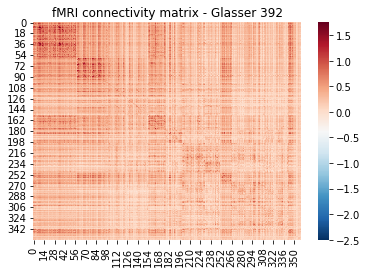

In [83]:

plt1 = sns.heatmap(averaged_array, vmin=-2.5, vmax=1.75, cmap="RdBu_r")
plt1.set_title("fMRI connectivity matrix - Glasser 392")
plt.show()
